#  1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [28]:
# 시작전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
# 한글설정
#plt.rc('font', family='Malgun Gothic')
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
# 경고메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')

# 2. df_first와 df_last 생성

In [2]:
import pandas as pd
import numpy as np
df_first = pd.read_csv('/Users/yeonju1/Documents/bigData/Download/sharedBigdata/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [3]:
df_first = df_first.melt(id_vars=['지역'], var_name='연도월', value_name='평당분양가격')
df_first

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [6]:
df_last = pd.read_csv('/Users/yeonju1/Documents/bigData/Download/sharedBigdata/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv', encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [7]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      5780 non-null   object
 1   규모구분     5780 non-null   object
 2   연도       5780 non-null   int64 
 3   월        5780 non-null   int64 
 4   분양가격(㎡)  5331 non-null   object
dtypes: int64(2), object(3)
memory usage: 225.9+ KB


# 3. df_last 결측치 확인

In [8]:
df_last.describe(include='all')

,지역명,규모구분,연도,월,분양가격(㎡)
count,5780,5780,5780.000000,5780.000000,5331
unique,17,5,NaN,NaN,2175
top,전북,전용면적 60㎡초과 85㎡이하,NaN,NaN,3395
freq,340,1156,NaN,NaN,18
mean,NaN,NaN,2018.088235,6.441176,NaN
std,NaN,NaN,1.678163,3.533270,NaN
min,NaN,NaN,2015.000000,1.000000,NaN
25%,NaN,NaN,2017.000000,3.000000,NaN
50%,NaN,NaN,2018.000000,6.000000,NaN
75%,NaN,NaN,2019.250000,10.000000,NaN


In [9]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    449
dtype: int64

# 4. df_last에 평당분양가격 컬럼 추가

In [10]:
df_last['평당분양가격'] = 0.0
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5780 non-null   object 
 1   규모구분     5780 non-null   object 
 2   연도       5780 non-null   int64  
 3   월        5780 non-null   int64  
 4   분양가격(㎡)  5331 non-null   object 
 5   평당분양가격   5780 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 271.1+ KB


In [11]:
# 분양가격에 콤마가 있는 행
df_last[df_last['분양가격(㎡)'].notnull() & (df_last['분양가격(㎡)'].str.find(',') != -1)]

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
2125,서울,모든면적,2017,11,"6,657",0.0
2126,서울,전용면적 60㎡이하,2017,11,"6,931",0.0
2127,서울,전용면적 60㎡초과 85㎡이하,2017,11,"5,899",0.0
2128,서울,전용면적 85㎡초과 102㎡이하,2017,11,"7,311",0.0
2129,서울,전용면적 102㎡초과,2017,11,"6,880",0.0
...,...,...,...,...,...,...
2203,경남,전용면적 85㎡초과 102㎡이하,2017,11,"2,914",0.0
2204,경남,전용면적 102㎡초과,2017,11,"2,838",0.0
2205,제주,모든면적,2017,11,"3,560",0.0
2206,제주,전용면적 60㎡이하,2017,11,"5,380",0.0


In [13]:
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5780 non-null   object 
 1   규모구분     5780 non-null   object 
 2   연도       5780 non-null   int64  
 3   월        5780 non-null   int64  
 4   분양가격(㎡)  5239 non-null   float64
 5   평당분양가격   5780 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 271.1+ KB


In [14]:
df_last['평당분양가격'] = df_last['분양가격(㎡)']*3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


# 5. df_last에 전용면적 컬럼 추가(규모구분 컬럼 이용)

In [15]:
df_last['전용면적'] = ''
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6,
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6,
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3,
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7,


In [16]:
df_last['규모구분'] = df_last['규모구분'].apply(lambda data : data.replace('모든면적',' 전체'))
df_last

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,전용면적
0,서울,전체,2015,10,5841.0,19275.3,
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6,
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6,
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3,
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7,
...,...,...,...,...,...,...,...
5775,제주,전체,2021,5,7510.0,24783.0,
5776,제주,전용면적 60㎡이하,2021,5,NaN,NaN,
5777,제주,전용면적 60㎡초과 85㎡이하,2021,5,7497.0,24740.1,
5778,제주,전용면적 85㎡초과 102㎡이하,2021,5,NaN,NaN,


In [17]:
df_last['전용면적'] = df_last['규모구분']
df_last

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,전용면적
0,서울,전체,2015,10,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6,전용면적 60㎡이하
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6,전용면적 60㎡초과 85㎡이하
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3,전용면적 85㎡초과 102㎡이하
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7,전용면적 102㎡초과
...,...,...,...,...,...,...,...
5775,제주,전체,2021,5,7510.0,24783.0,전체
5776,제주,전용면적 60㎡이하,2021,5,NaN,NaN,전용면적 60㎡이하
5777,제주,전용면적 60㎡초과 85㎡이하,2021,5,7497.0,24740.1,전용면적 60㎡초과 85㎡이하
5778,제주,전용면적 85㎡초과 102㎡이하,2021,5,NaN,NaN,전용면적 85㎡초과 102㎡이하


In [18]:
df_last['전용면적'] = df_last['규모구분'].apply(lambda data : 
                                        data.split('적')[-1].replace('초과','~')
                                        .replace('이하','').replace(' ',''))
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,전용면적
0,서울,전체,2015,10,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7,102㎡~


# 6. 사용하지 않을 규모구분과 분양가격((㎡)컬럼을 제거한 후, 메모리 사용량을 전후로 확인

In [19]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5780 non-null   object 
 1   규모구분     5780 non-null   object 
 2   연도       5780 non-null   int64  
 3   월        5780 non-null   int64  
 4   분양가격(㎡)  5239 non-null   float64
 5   평당분양가격   5239 non-null   float64
 6   전용면적     5780 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 316.2+ KB


In [20]:
df_last = df_last.drop(['규모구분','분양가격(㎡)'], axis=1)
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
5775,제주,2021,5,24783.0,전체
5776,제주,2021,5,NaN,60㎡
5777,제주,2021,5,24740.1,60㎡~85㎡
5778,제주,2021,5,NaN,85㎡~102㎡


In [21]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     5780 non-null   object 
 1   연도      5780 non-null   int64  
 2   월       5780 non-null   int64  
 3   평당분양가격  5239 non-null   float64
 4   전용면적    5780 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 225.9+ KB


# 7.GroupBy(unstack()함수 이용) vs. pivot_table
## 1) 지역별 데이터 수

In [22]:
df_last.groupby(['지역명']).count().T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340
월,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340
평당분양가격,323,335,326,314,281,327,251,335,335,280,214,331,329,333,275,317,333
전용면적,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340


## 2) 지역별 평당분양가격 (평균)

In [23]:
df_last.groupby(['지역명']).mean().T[2:3].T

,평당분양가격
지역명,
강원,8513.887616
경기,13770.545373
경남,9697.110736
경북,8845.387261
광주,10961.214235
대구,12870.898165
대전,10460.474104
부산,12436.025373
서울,25097.504776


## 3) 전용면적별 평당분양가격(평균)

In [24]:
df_last.groupby(['전용면적']).mean().T[2:3].T

,평당분양가격
전용면적,
102㎡~,12158.183186
60㎡,10928.500000
60㎡~85㎡,10853.938448
85㎡~102㎡,11844.695066
전체,10869.903470


## 4) 지역별, 전용면적별 평당분양가격 (평균)

In [25]:
df_last.groupby(['지역명','전용면적']).mean().T[2:3].T

평당분양가격
지역명 전용면적                 
강원  102㎡~     9572.561194
    60㎡       8209.217910
    60㎡~85㎡   7957.285075
    85㎡~102㎡  8914.980000
    전체        7987.231343
...                   ...
충북  102㎡~     8430.022388
    60㎡       7370.180597
    60㎡~85㎡   7501.491045
    85㎡~102㎡  8508.415385
    전체        7453.616418

[85 rows x 1 columns]

## 5) 연도, 지역별 평당분양가격(평균) – 힌트:unstack()

In [26]:
a= df_last.groupby(['지역명', '연도'])['평당분양가격'].mean()
a.unstack()

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000,10302.423214,10539.540000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000,15106.080000,14701.764000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789,10919.272222,11289.168000
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000,9997.693750,11152.680000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000,13406.485714,13711.637500
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000,15314.200000,15622.200000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000,11238.844737,11222.860000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000,13353.010000,13724.304000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000,29781.015000,28832.364000


# 8.위에서 그룹화 한 내용을 선그래프와 막대그래프로 시각화

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

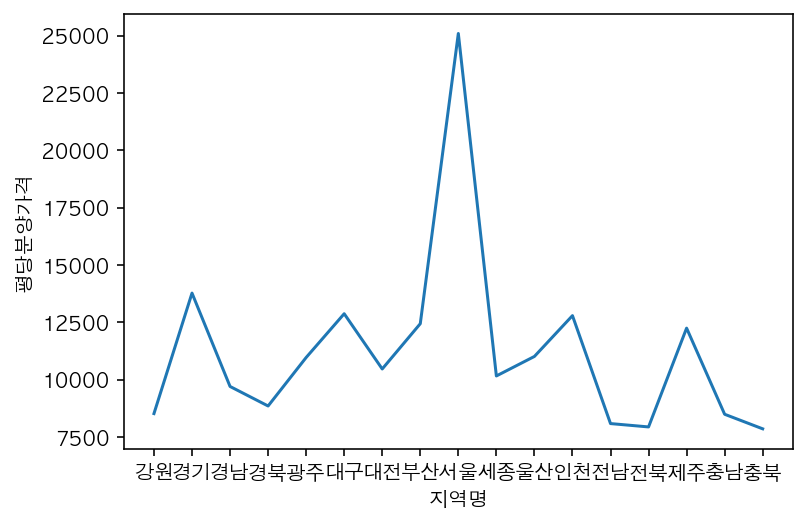

In [30]:
import seaborn as sns
r = df_last.groupby('지역명')['평당분양가격'].mean()
sns.lineplot(data=r.to_frame(), x=r.index, y=r)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

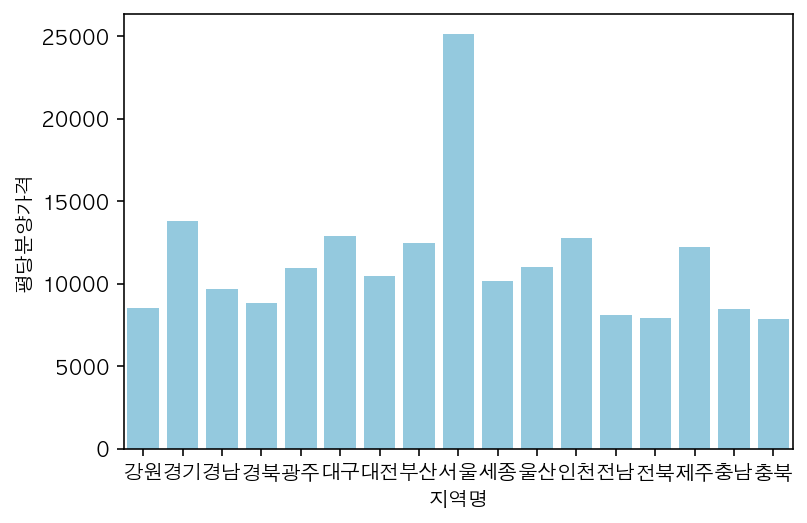

In [31]:
r = df_last.groupby('지역명')['평당분양가격'].mean()
sns.barplot(data=r.to_frame(), x=r.index, y=r, color='skyblue')

<AxesSubplot:xlabel='전용면적', ylabel='평당분양가격'>

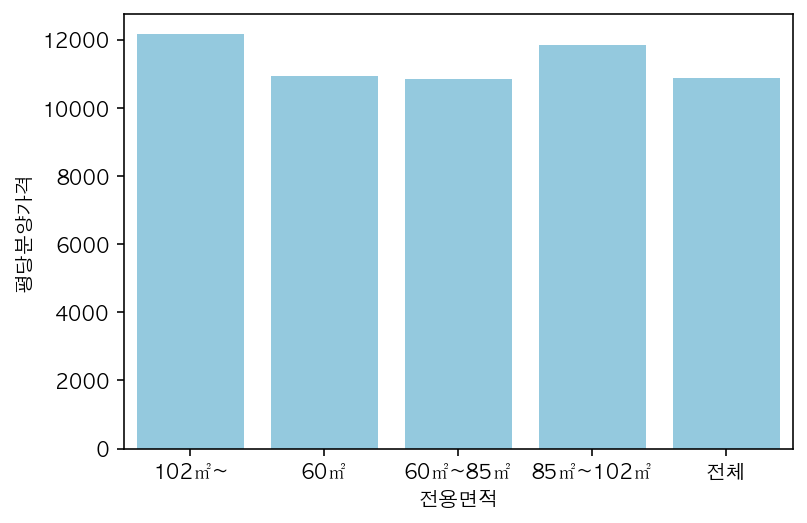

In [32]:
r = df_last.groupby('전용면적')['평당분양가격'].mean()
sns.barplot(data=r.to_frame(), x=r.index, y=r, color='skyblue')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

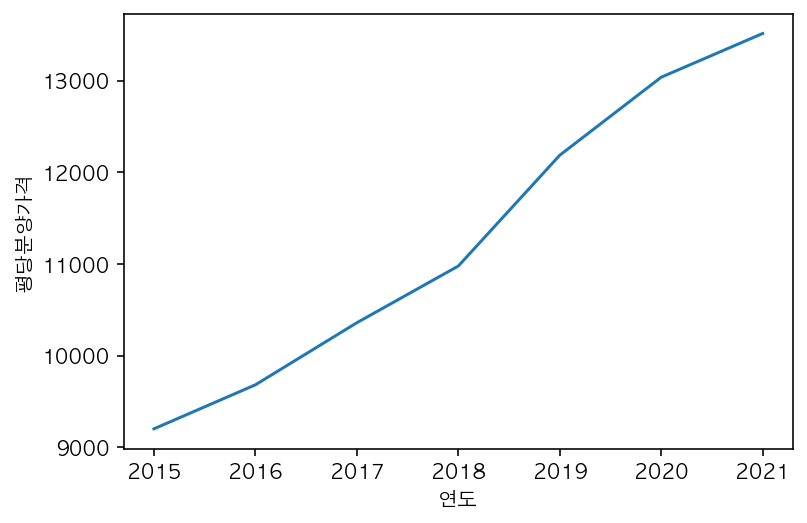

In [42]:
r = df_last.groupby('연도')['평당분양가격'].mean()
sns.lineplot(data=r.to_frame(), x=r.index, y=r)

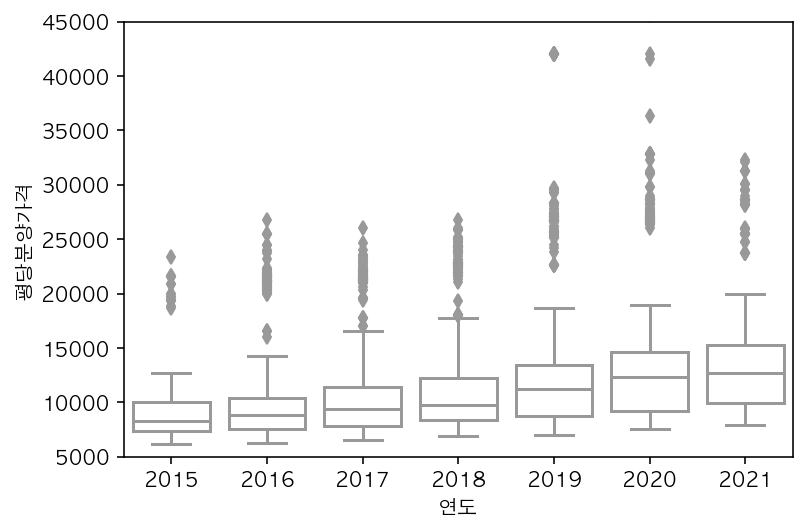

In [138]:
# 연도별(월별데이터로), 전용면적별 box플롯
ax = sns.boxplot(data=df_last, x="연도", y="평당분양가격", color='white')
ax.set_ylim([5000, 45000]) 
plt.show()

# 9.seaborn으로 시각화
## 1) 지역별 평당분양가격(평균)
## 2) 연도별 평당분양가격(평균)
## 3) 전용면적별 평당분양가격(평균)

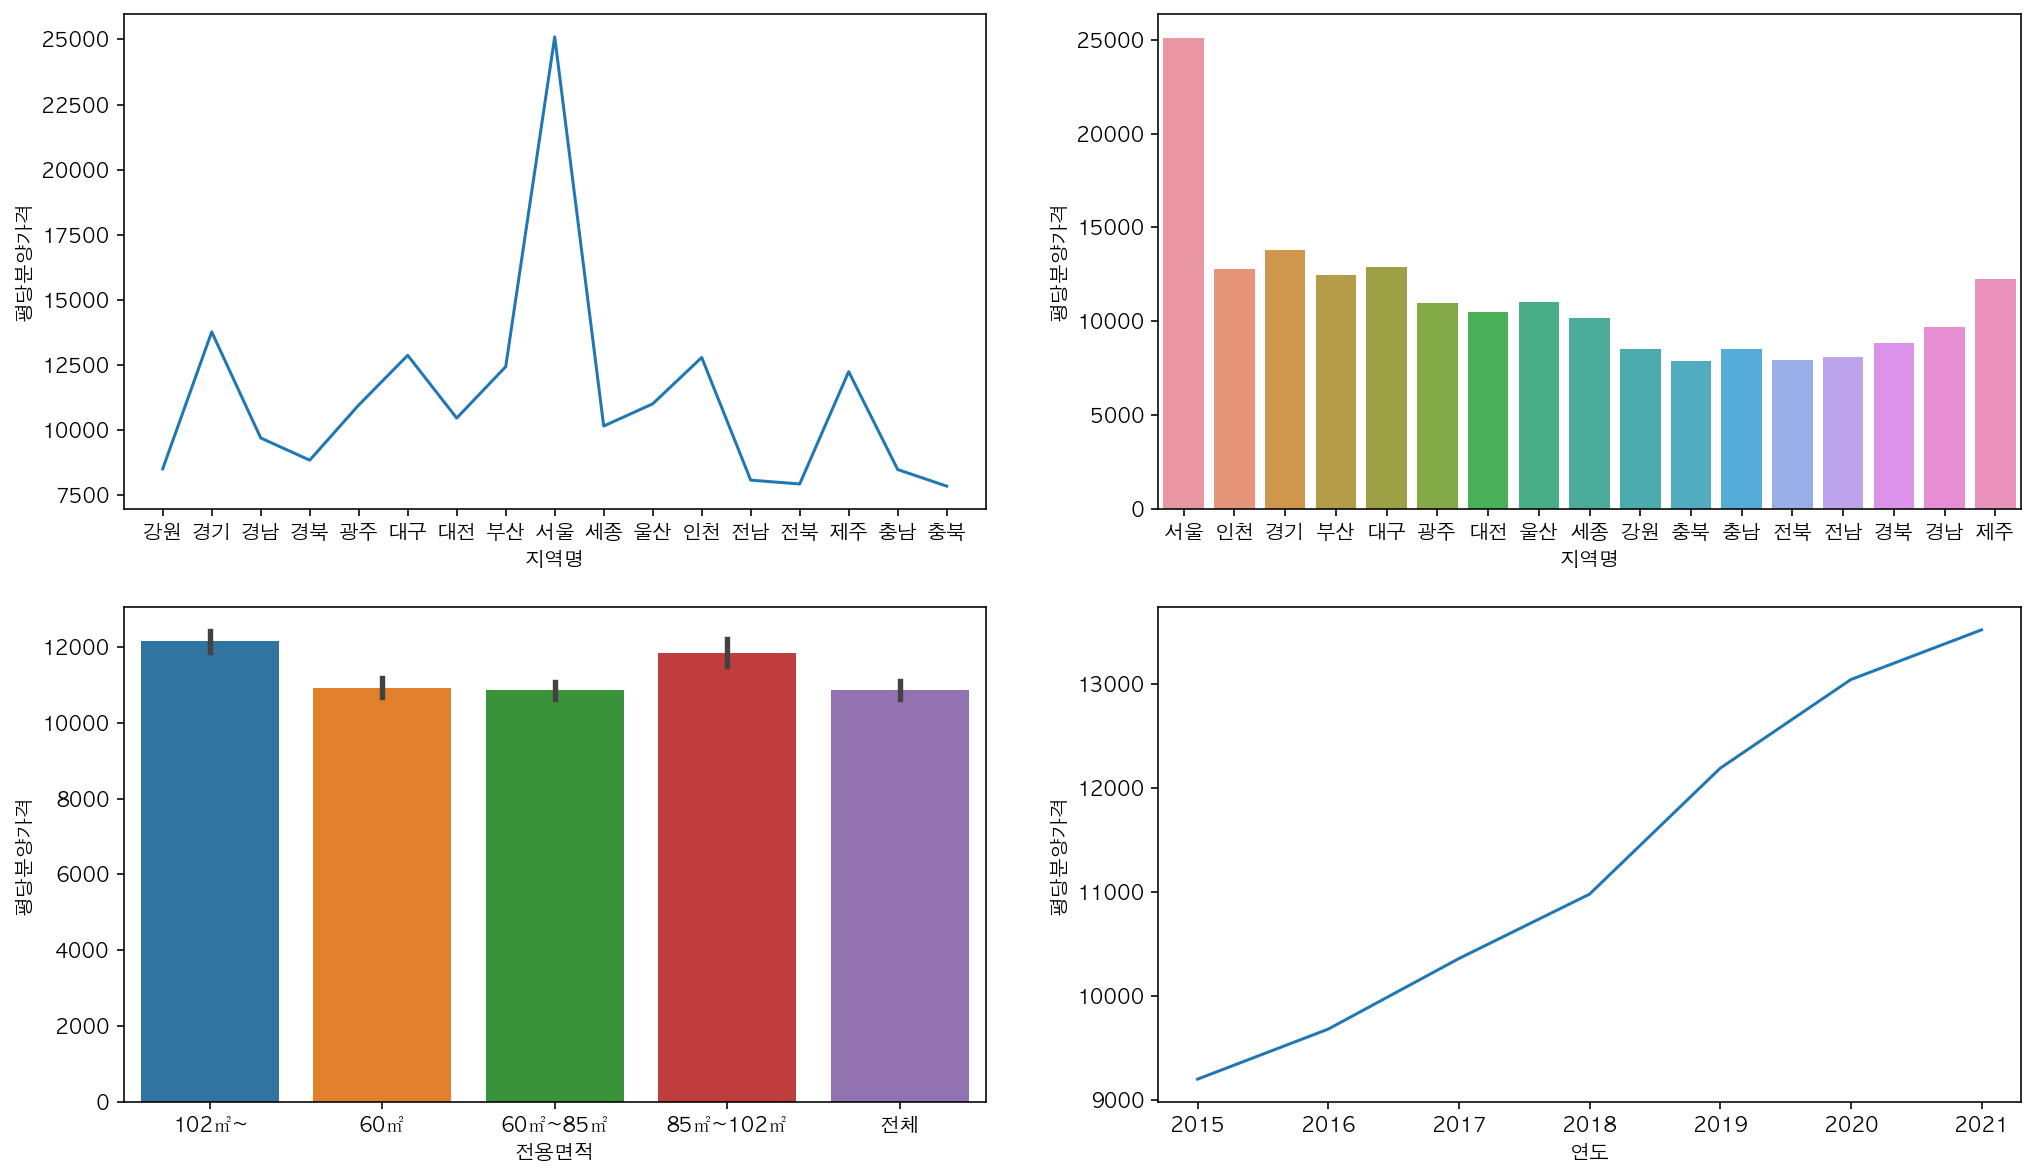

In [35]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17,10))
plt.subplots_adjust(wspace=0.2) # 서브플롯 사이의 패딩 너비 조정

sns.lineplot(data=df_last.sort_values('지역명', ascending=True), x='지역명', y='평당분양가격',  ci=None, ax=axes[0,0]) #ax=axes[0]사용
sns.barplot(data=df_last, x='지역명', y='평당분양가격', ci=None, ax=axes[0,1])
sns.barplot(data=df_last.sort_values('전용면적'), x='전용면적', y='평당분양가격', ax=axes[1,0])
sns.lineplot(data=df_last, x='연도', y='평당분양가격', ci=None, ax=axes[1,1])
plt.savefig('이연주포트폴리오_그래프.png') # 저장
plt.show()

# 10.구조가 다른 df_first와 df_last의 전용면적 전체의 데이터를 하나의 같은 데이터 셋으로 합쳐서 분석을 한다. (분석은 위의 내용을 참조하여 각자 분석)

In [36]:
df_first

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [37]:
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
5775,제주,2021,5,24783.0,전체
5776,제주,2021,5,NaN,60㎡
5777,제주,2021,5,24740.1,60㎡~85㎡
5778,제주,2021,5,NaN,85㎡~102㎡


In [50]:
df_last["연도월"] = df_last["연도"].astype('str') + "년" + df_last["월"].astype('str') + "월"
df_last["지역"] = df_last["지역명"]
df_last

,지역명,연도,월,평당분양가격,전용면적,연도월,지역
0,서울,2015,10,19275.3,전체,2015년10월,서울
1,서울,2015,10,18651.6,60㎡,2015년10월,서울
2,서울,2015,10,19410.6,60㎡~85㎡,2015년10월,서울
3,서울,2015,10,18879.3,85㎡~102㎡,2015년10월,서울
4,서울,2015,10,19400.7,102㎡~,2015년10월,서울
...,...,...,...,...,...,...,...
5775,제주,2021,5,24783.0,전체,2021년5월,제주
5776,제주,2021,5,NaN,60㎡,2021년5월,제주
5777,제주,2021,5,24740.1,60㎡~85㎡,2021년5월,제주
5778,제주,2021,5,NaN,85㎡~102㎡,2021년5월,제주


In [51]:
new_last = df_last[df_last['전용면적']=='전체']
new_last.head()

,지역명,연도,월,평당분양가격,전용면적,연도월,지역
0,서울,2015,10,19275.3,전체,2015년10월,서울
5,인천,2015,10,10437.9,전체,2015년10월,인천
10,경기,2015,10,10355.4,전체,2015년10월,경기
15,부산,2015,10,10269.6,전체,2015년10월,부산
20,대구,2015,10,8850.6,전체,2015년10월,대구


In [52]:
new_last = new_last.drop(['지역명','연도','월','전용면적'], axis=1)
new_last.head()

,평당분양가격,연도월,지역
0,19275.3,2015년10월,서울
5,10437.9,2015년10월,인천
10,10355.4,2015년10월,경기
15,10269.6,2015년10월,부산
20,8850.6,2015년10월,대구


In [53]:
result = pd.concat([df_first, new_last])
result

,지역,연도월,평당분양가격
0,서울,2013년12월,18189.0
1,부산,2013년12월,8111.0
2,대구,2013년12월,8080.0
3,인천,2013년12월,10204.0
4,광주,2013년12월,6098.0
...,...,...,...
5755,전북,2021년5월,8853.9
5760,전남,2021년5월,9659.1
5765,경북,2021년5월,9989.1
5770,경남,2021년5월,10197.0


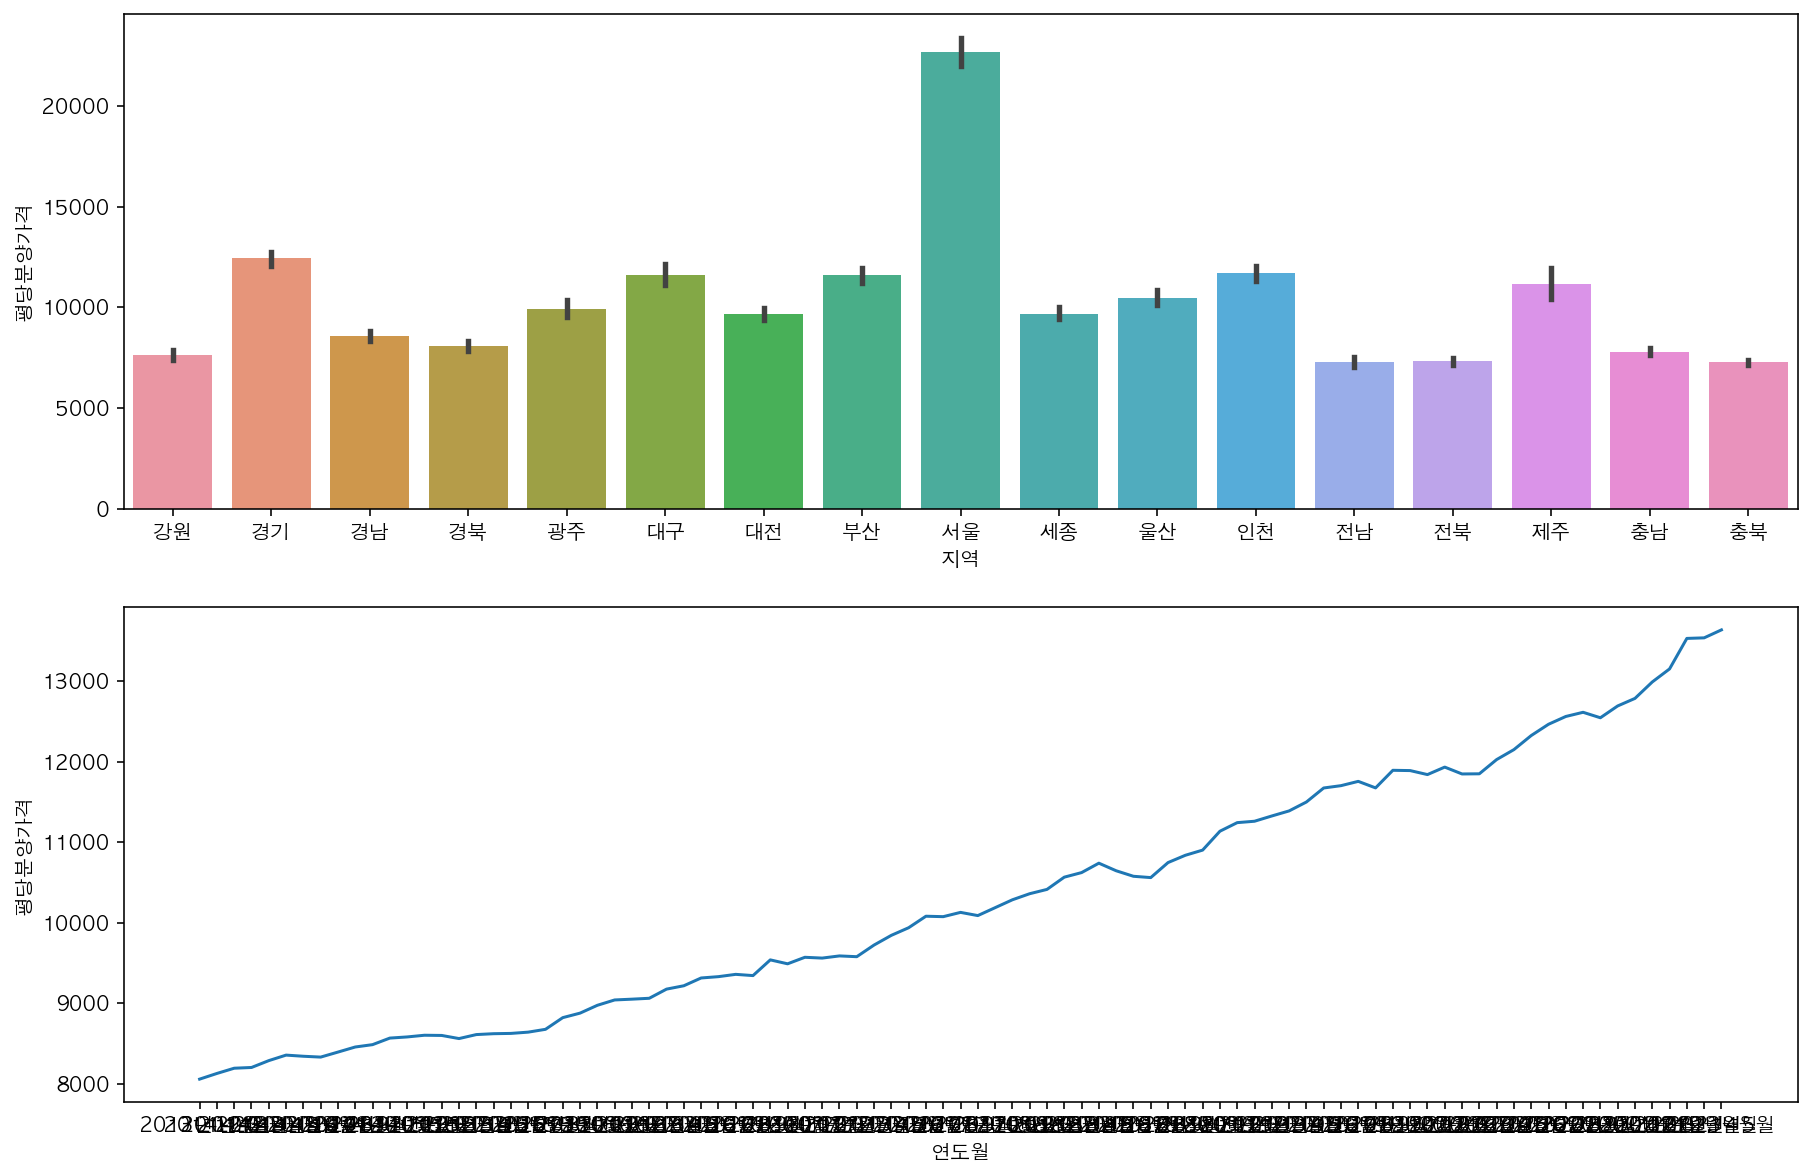

In [68]:
import seaborn as sns
fig, axes = plt.subplots(2, 1, figsize=(15,10))
plt.subplots_adjust(wspace=0.2)

sns.barplot(data=result.sort_values('지역'), x='지역', y='평당분양가격', ax=axes[0])
sns.lineplot(data=result, x='연도월', y='평당분양가격', ci=None, ax=axes[1])
plt.show()